# Demonstration of the evomap Package

Replication file for the paper

Matthe, Maximilian (2023), "evomap: A Python Package for Dynamic Mapping". 

Python environment: evomap-package

ToDo List
- Shepard Diagram --> CHeck if order in isotonic regression is really correct? (for shepard diagram AND mds code)

# Setup

In [1]:
import pandas as pd
import numpy as np
import os

PATH_HOME = os.path.dirname(os.getcwd())
PATH_OUT = os.path.join(PATH_HOME, 'gen')

In [2]:
from evomap.datasets import load_tnic_snapshot_small

data = load_tnic_snapshot_small()

In [3]:
title_fontdict = {'size': 12, 'family': 'Arial'}
label_fontdict = {'size': 10, 'family': 'Arial'}

# Load Sample Data

In [4]:
S = data['matrix']
labels = data['labels']
labels

array(['APPLE INC', 'AT&T INC', 'COMCAST CORP', 'EBAY INC', 'HP INC',
       'INTUIT INC', 'MICROSOFT CORP', 'ORACLE CORP', 'US CELLULAR CORP',
       'WESTERN DIGITAL CORP'], dtype='<U20')

In [5]:
np.round(S, 2)

array([[0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.06, 0.04, 0.  , 0.07],
       [0.  , 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  ],
       [0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.03, 0.  , 0.  , 0.  ],
       [0.07, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.09, 0.  , 0.  , 0.05, 0.  , 0.  , 0.  ],
       [0.06, 0.  , 0.  , 0.03, 0.01, 0.05, 0.  , 0.1 , 0.  , 0.03],
       [0.04, 0.  , 0.  , 0.  , 0.01, 0.  , 0.1 , 0.  , 0.  , 0.03],
       [0.  , 0.08, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.07, 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.03, 0.  , 0.  ]])

In [6]:
from evomap.preprocessing import sim2diss
D = sim2diss(S, transformation = 'mirror')
np.round(D, 2)

array([[0.  , 0.1 , 0.1 , 0.1 , 0.03, 0.1 , 0.04, 0.06, 0.1 , 0.03],
       [0.1 , 0.  , 0.06, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.02, 0.1 ],
       [0.1 , 0.06, 0.  , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.08, 0.1 ],
       [0.1 , 0.1 , 0.1 , 0.  , 0.1 , 0.01, 0.07, 0.1 , 0.1 , 0.1 ],
       [0.03, 0.1 , 0.1 , 0.1 , 0.  , 0.1 , 0.09, 0.09, 0.1 , 0.1 ],
       [0.1 , 0.1 , 0.1 , 0.01, 0.1 , 0.  , 0.04, 0.09, 0.1 , 0.1 ],
       [0.04, 0.1 , 0.1 , 0.07, 0.09, 0.04, 0.  , 0.  , 0.1 , 0.07],
       [0.06, 0.1 , 0.1 , 0.1 , 0.09, 0.09, 0.  , 0.  , 0.1 , 0.06],
       [0.1 , 0.02, 0.08, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.  , 0.1 ],
       [0.03, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.07, 0.06, 0.1 , 0.  ]])

# Section 1: Static MDS Demonstration

In [7]:
from evomap.mapping import MDS
Y = MDS(mds_type = 'interval', init = 'cmds').fit_transform(D)

[MDS] Iteration 17: gradient norm vanished. Final cost: 0.20


In [8]:
from matplotlib import pyplot as plt
from evomap.printer import draw_map

fig, ax = plt.subplots(1,2, figsize = (14,7))
draw_map(
    Y, 
    labels = labels, 
    ax = ax[0])

ax[0].set_title('A: Non-Metric MDS Map \n', fontdict = title_fontdict)
ax[0].set_xlabel('Dimension 1', fontdict = label_fontdict)
ax[0].set_ylabel('Dimension 2', fontdict = label_fontdict)

Text(0, 0.5, 'Dimension 2')

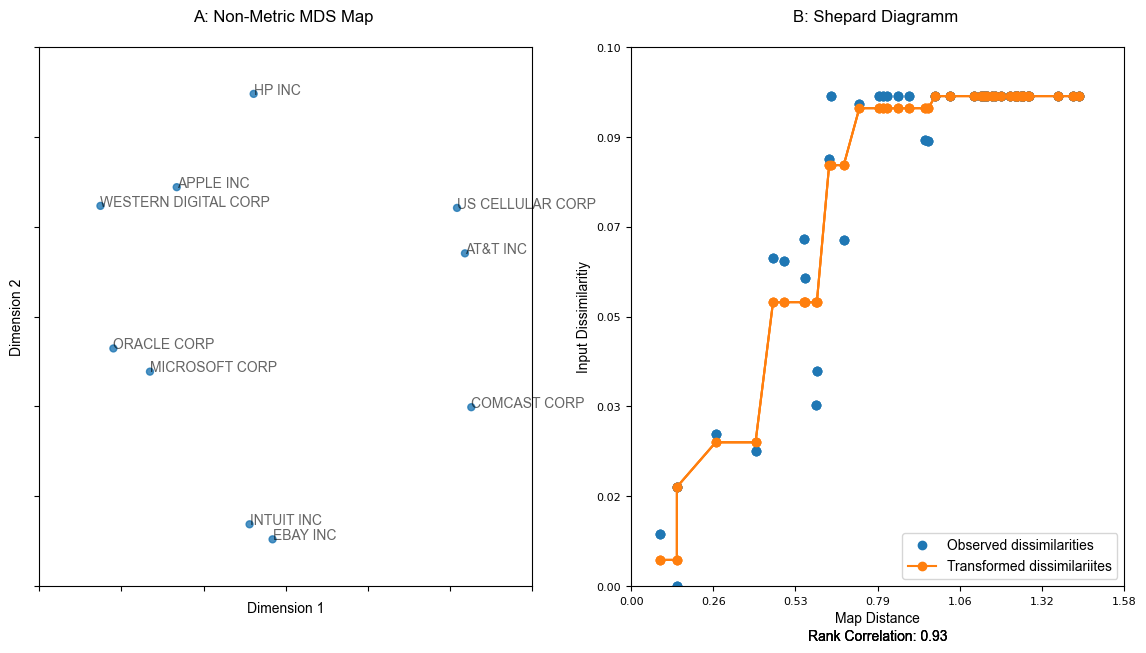

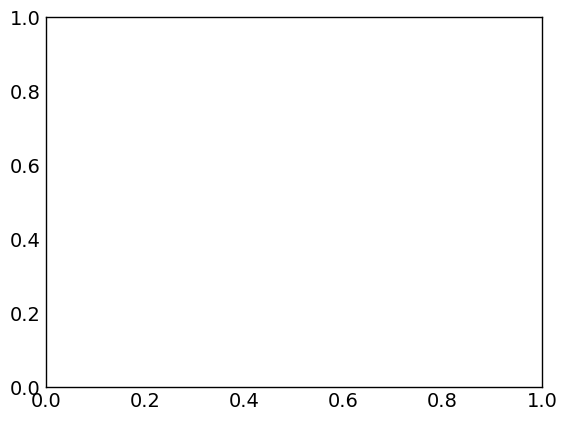

In [11]:
def draw_shepard_diagramm(Y, D, ax = None):
    
    from sklearn.isotonic import IsotonicRegression
    from scipy.spatial.distance import cdist
    from scipy.stats import spearmanr

    if type(Y) == list and type(D) == list:
        all_distances = np.array([])
        all_disparities = np.array([])
        n_periods = len(Y)
        for t in range(n_periods):
            distances = cdist(Y[t], Y[t], metric = 'euclidean')
            distances_flat = distances[np.tril_indices(len(distances),-1)]
            disparities_flat = D[t][np.tril_indices(len(D[t]),-1)]
            all_disparities = np.concatenate(all_disparities, disparities_flat)
            all_distances = np.concatenate(all_distances, distances_flat)        

    else:
        distances = cdist(Y, Y, metric = 'euclidean')
        distances_flat = distances[np.tril_indices(len(distances),-1)]
        disparities_flat = D[np.tril_indices(len(D),-1)]        

    ir = IsotonicRegression()

    disp_hat = ir.fit_transform(distances_flat, disparities_flat)
    df = pd.DataFrame({'disp': disparities_flat, 'dist': distances_flat, 'disp_hat' : disp_hat})
    df = df.sort_values('dist')

    from matplotlib.ticker import FuncFormatter

    def format_tick_labels(x, pos):
        return '{0:.2f}'.format(x)

    if ax is None:
        fig, ax = plt.subplots(figsize = (5,5))

    ax.plot(df['dist'], df['disp'], "C0.", markersize = 12)
    ax.plot(df['dist'], df['disp_hat'], "C1.-", markersize = 12)
    ax.set_ylabel('Input Dissimilaritiy', fontdict= label_fontdict)
    ax.set_xlabel('Map Distance', fontdict = label_fontdict)
    y_min = 0
    y_max = df['disp_hat'].max() * 1.1
    x_min = 0
    x_max = df['dist'].max() * 1.1
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    y_ticks = np.linspace(y_min, y_max, 7)
    x_ticks = np.linspace(x_min, x_max, 7)

    ax.set_yticks(y_ticks)
    ax.set_xticks(x_ticks)
    ax.tick_params(axis = 'both', labelsize = 8)
    ax.xaxis.set_major_formatter(FuncFormatter(format_tick_labels))
    ax.yaxis.set_major_formatter(FuncFormatter(format_tick_labels))

    ax.text(0.5, -0.1, 
           "Rank Correlation: {0:.2f}".format(spearmanr(df['dist'], df['disp_hat'])[0]), 
           ha = 'center', 
           transform = ax.transAxes, 
           fontdict = label_fontdict)
    
    plt.grid(False)

draw_shepard_diagramm(Y,D, ax[1])
ax[1].set_title('B: Shepard Diagramm \n', fontdict= title_fontdict)
ax[1].legend(['Observed dissimilarities', 'Transformed dissimilariites'], loc = 4, prop = label_fontdict)
fig.savefig(os.path.join(PATH_OUT, 'sect1_mds_statc.PNG'), dpi = 300)
fig

In [ ]:
from evomap.datasets import load_tnic_sample_small
data = load_tnic_sample_small()
labels = data[data['sic1'].map(lambda x: x.startswith("36"))].groupby('name1').agg({'year':'nunique'}).query('year == 20').index.values
labels = [label for label in labels if not label == "CALAMP CORP"] # Exclude calamp corp, as it has no connections to the others in one period
labels

In [ ]:
data = data.query('name1 in @labels').query('name2 in @labels')
data = data[['year', 'name1', 'name2', 'score']]
data = data.sort_values(['year', 'name1'])
data.groupby('name1').agg({'year': 'nunique'})

In [ ]:
periods = data.year.unique()

In [ ]:
from evomap.preprocessing import edgelist2matrix
matrix, label = edgelist2matrix(data, score_var= 'score', id_var_i= 'name1', id_var_j= 'name2')

In [ ]:
def edgelist2matrices(data, score_var, id_var_i, id_var_j, time_var):
    periods = data[time_var].unique()
    matrices = []
    for period in periods:
        data_t = data[data[time_var] == period]
        mat_t, labels = edgelist2matrix(data_t, 
                                        score_var = score_var,
                                         id_var_i = id_var_i, 
                                         id_var_j = id_var_j)
        matrices.append(mat_t)
    return matrices, label

S_t, lables = edgelist2matrices(data, score_var= 'score', id_var_i = 'name1', id_var_j='name2', time_var='year')

In [ ]:
D_t = []
for S in S_t:
    D_t.append(sim2diss(S, transformation = 'mirror'))

In [ ]:
Y_0 = MDS(
    mds_type= 'ordinal',
    init = 'cmds', 
    verbose = 2).fit_transform(D_t[0])


In [ ]:
Y_1 = MDS(
    mds_type= 'ordinal',
    init = 'cmds', 
    verbose = 2).fit_transform(D_t[2])


In [ ]:
fig, ax = plt.subplots(2,2,figsize = (14,14))
draw_map(Y_0, labels = label, ax = ax[0,0])
ax[0,0].set_title('A: Non-Metric MDS Map in {0}\n'.format(periods[0]), fontdict = title_fontdict)
ax[0,0].set_xlabel('Dimension 1', fontdict = label_fontdict)
ax[0,0].set_ylabel('Dimension 2', fontdict = label_fontdict)

draw_map(Y_1, labels = label, ax = ax[0,1])
ax[0,1].set_title('B: Non-Metric MDS Map in {0}\n'.format(periods[2]), fontdict = title_fontdict)
ax[0,1].set_xlabel('Dimension 1', fontdict = label_fontdict)
ax[0,1].set_ylabel('Dimension 2', fontdict = label_fontdict)

draw_shepard_diagramm(Y_0, D_t[0], ax[1,0])
ax[1,0].set_title('C: Shepard Diagramm in {0}\n'.format(periods[0]), fontdict = title_fontdict)
ax[1,0].set_xlabel('Map Distance', fontdict = label_fontdict)
ax[1,0].set_ylabel('Input Dissimilarity', fontdict = label_fontdict)

draw_shepard_diagramm(Y_1, D_t[2], ax[1,1])
ax[1,1].set_title('D: Shepard Diagramm in {0}\n'.format(periods[2]), fontdict = title_fontdict)
ax[1,1].set_xlabel('Map Distance', fontdict = label_fontdict)
ax[1,1].set_ylabel('Input Dissimilarity', fontdict = label_fontdict)
fig.savefig(os.path.join(PATH_OUT, 'sect1_mds_dynamic.PNG'), dpi = 300)
fig

# Dynamic Mapping Example

In [ ]:
from evomap.mapping import CMDS
n_samples = D_t[0].shape[0]
n_periods = len(D_t)
Y_inits = []
for t in range(n_periods):
    Y_inits.append(CMDS().fit_transform(D_t[t]))

In [ ]:
from evomap.mapping import EvoMDS

X_t = EvoMDS(alpha = 0.5,
             mds_type = 'ratio',
             n_iter_check = 50, 
             init = Y_inits,
             verbose = 2).fit_transform(D_t) 

In [ ]:
from evomap.printer import draw_dynamic_map
draw_dynamic_map(X_t, show_arrows=True, labels = labels, annotate = 'labels')

In [ ]:
def plot_evolving_party_positions(results, inclusions, timestamps = None, title_str = "", filename = ""):
    fig, ax = plt.subplots(figsize = (10,10))
    n_periods = len(results)
    for t, result in enumerate(results): 
        for i in range(len(result)):
            if inclusions[t][i] == 1:
                if n_periods > 1:
                    size = [25]
                else:
                    size = [100]
                ax.scatter(result[i, 0], result[i,1], c = palette[party_labels[i]], marker = markers[party_labels[i]], s = size)
                if t == len(results) -1 :
#                    if n_periods > 1:
#                        ax.text(result[i, 0], result[i,1], timestamps[t], size = 10, alpha = .5)
#                    else:
                    if n_periods < 48:
                        ax.text(result[i, 0], result[i,1], party_labels[i], size = 20, alpha = 1, c = palette[party_labels[i]])

                
                if t > 0:
                    if inclusions[t-1][i] == 1:
                        x1 = results[t-1][i,0]
                        x2 = results[t][i,0]
                        y1 = results[t-1][i,1]
                        y2 = results[t][i,1]

                        plt.plot([x1, x2], [y1,y2], c = palette[party_labels[i]])


    ax.set_xticklabels(ax.get_xticklabels(), fontdict = fontdict)
    ax.set_yticklabels(ax.get_yticklabels(), fontdict = fontdict)
    ax.set_title(title_str, fontdict = fontdict.update({'fontsize': 20}))


    ax.spines['left'].set_position('zero')
    ax.spines['left'].set_linewidth(.5)
    ax.spines['bottom'].set_position('zero')
    ax.spines['bottom'].set_linewidth(.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.grid(False)

    x_range = [-1.3, 1.3]
    y_range = [-1.3, 1.3]

    ax.set_xlim(x_range)
    ax.set_ylim(y_range)

    # Set the number of xticks and the tick positions
    num_ticks = 7
    x_tick_positions = np.linspace(x_range[0], x_range[1], num_ticks)
    y_tick_positions = np.linspace(y_range[0], y_range[1], num_ticks)

    # Set the xticks and labels
    ax.set_xticks(x_tick_positions)
    ax.set_xticklabels([f'{x:.1f}' for x in x_tick_positions])

    ax.set_yticks(y_tick_positions)
    ax.set_yticklabels([f'{x:.1f}' for x in y_tick_positions])
    ax.tick_params(axis='both', which='major', labelsize=8, labelcolor='grey')

    if not filename == "":
        fig.savefig(os.path.join(PATH_AUDIT, filename), dpi = 300)

plot_evolving_party_positions(
    results, 
    inclusions, 
    all_timestamps, 
    all_timestamps[0] + " - " + all_timestamps[-1],
    "monthly_positions_all.PNG")

In [ ]:
from evomap.metrics import align_score
align_score(X_t)

In [ ]:
draw_map(X_t[0], labels = labels)

In [ ]:
draw_map(X_t[-1], labels = labels)

In [ ]:
all_disparities

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))

Y = X_t.copy()
D = D_t.copy()

from sklearn.isotonic import IsotonicRegression
from scipy.spatial.distance import cdist
from scipy.stats import spearmanr

if type(Y) == list and type(D) == list:
    distances_flat = np.array([])
    disparities_flat = np.array([])
    n_periods = len(Y)
    for t in range(n_periods):
        distances = cdist(Y[t], Y[t], metric = 'euclidean')
        distances_flat_t = distances[np.tril_indices(len(distances),-1)]
        disparities_flat_t = D[t][np.tril_indices(len(D[t]),-1)]
        disparities_flat = np.concatenate([disparities_flat, disparities_flat_t])
        distances_flat = np.concatenate([distances_flat, distances_flat_t])        

else:
    distances = cdist(Y, Y, metric = 'euclidean')
    distances_flat = distances[np.tril_indices(len(distances),-1)]
    disparities_flat = D[np.tril_indices(len(D),-1)]        

ir = IsotonicRegression()

disp_hat = ir.fit_transform(distances_flat, disparities_flat)
df = pd.DataFrame({'disp': disparities_flat, 'dist': distances_flat, 'disp_hat' : disp_hat})
df = df.sort_values('dist')

from matplotlib.ticker import FuncFormatter

def format_tick_labels(x, pos):
    return '{0:.2f}'.format(x)

if ax is None:
    fig, ax = plt.subplots(figsize = (5,5))

ax.plot(df['disp'], df['dist'], "C0.", markersize = 12)
ax.plot(df['disp_hat'], df['dist'], "C1.-", markersize = 12)
ax.set_xlabel('Input Dissimilaritiy', fontdict= label_fontdict)
ax.set_ylabel('Map Distance', fontdict = label_fontdict)
x_min = 0
x_max = df['disp_hat'].max() * 1.1
y_min = 0
y_max = df['dist'].max() * 1.1
ax.set_ylim(y_min, y_max)
ax.set_xlim(x_min, x_max)
y_ticks = np.linspace(y_min, y_max, 7)
x_ticks = np.linspace(x_min, x_max, 7)

ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks)
ax.tick_params(axis = 'both', labelsize = 8)
ax.xaxis.set_major_formatter(FuncFormatter(format_tick_labels))
ax.yaxis.set_major_formatter(FuncFormatter(format_tick_labels))

ax.text(0.5, -0.1, 
        "Rank Correlation: {0:.2f}".format(spearmanr(df['dist'], df['disp_hat'])[0]), 
        ha = 'center', 
        transform = ax.transAxes, 
        fontdict = label_fontdict)

plt.grid(False)


In [ ]:
all_disparities